<a href="https://colab.research.google.com/github/2xazo/ML/blob/main/bought_iPhone_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dataset = pd.read_csv("iPhone.csv")
dataset

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
dataset.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,3]

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_gender =  LabelEncoder()

x[:,0] = labelEncoder_gender.fit_transform(x[:,0])

In [ ]:
x

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver="liblinear")
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score:",accuracy)

precision = metrics.precision_score(y_test, y_pred)
print("Precision score:",precision)

recall = metrics.recall_score(y_test, y_pred)
print("Recall score:",recall)

[[65  3]
 [ 6 26]]
Accuracy score: 0.91
Precision score: 0.896551724137931
Recall score: 0.8125


<Axes: >

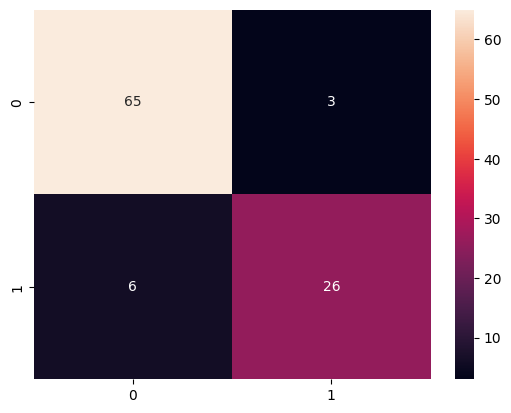

In [21]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
person1 = sc.transform([[1,21,40000]])
person2 = sc.transform([[1,41,80000]])
person3 = sc.transform([[0,41,40000]])

print("Male aged 21 making $40k will buy iPhone:", classifier.predict(person1))
print("Male aged 41 making $80k will buy iPhone:", classifier.predict(person2))
print("Female aged 41 making $40k will buy iPhone:", classifier.predict(person3))

Male aged 21 making $40k will buy iPhone: [0]
Male aged 41 making $80k will buy iPhone: [1]
Female aged 41 making $40k will buy iPhone: [0]


In [ ]:
if classifier.predict(person1) == 0:
    print("Male aged 21 making $40k: Will not purchase iPhone")
else:
    print("Male aged 21 making $40k: Will purchase iPhone")

if classifier.predict(person2) == 0:
    print("Male aged 41 making $80k: Will not purchase iPhone")
else:
    print("Male aged 41 making $80k: Will purchase iPhone")

if classifier.predict(person3) == 0:
    print("Female aged 41 making $40k: Will not purchase iPhone")
else:
    print("Female aged 41 making $40k: Will purchase iPhone")

Male aged 21 making $40k: Will not purchase iPhone
Male aged 41 making $80k: Will purchase iPhone
Female aged 41 making $40k: Will not purchase iPhone


In [ ]:
print("Male aged 21 making $40k will buy iPhone:", classifier.predict_proba(person1))
print("Male aged 41 making $80k will buy iPhone:", classifier.predict_proba(person2))
print("Female aged 41 making $40k will buy iPhone:", classifier.predict_proba(person3))

Male aged 21 making $40k will buy iPhone: [[0.99512659 0.00487341]]
Male aged 41 making $80k will buy iPhone: [[0.47788143 0.52211857]]
Female aged 41 making $40k will buy iPhone: [[0.79949842 0.20050158]]
